/Users/ricoschmitt/opt/anaconda3/envs/geo_env/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


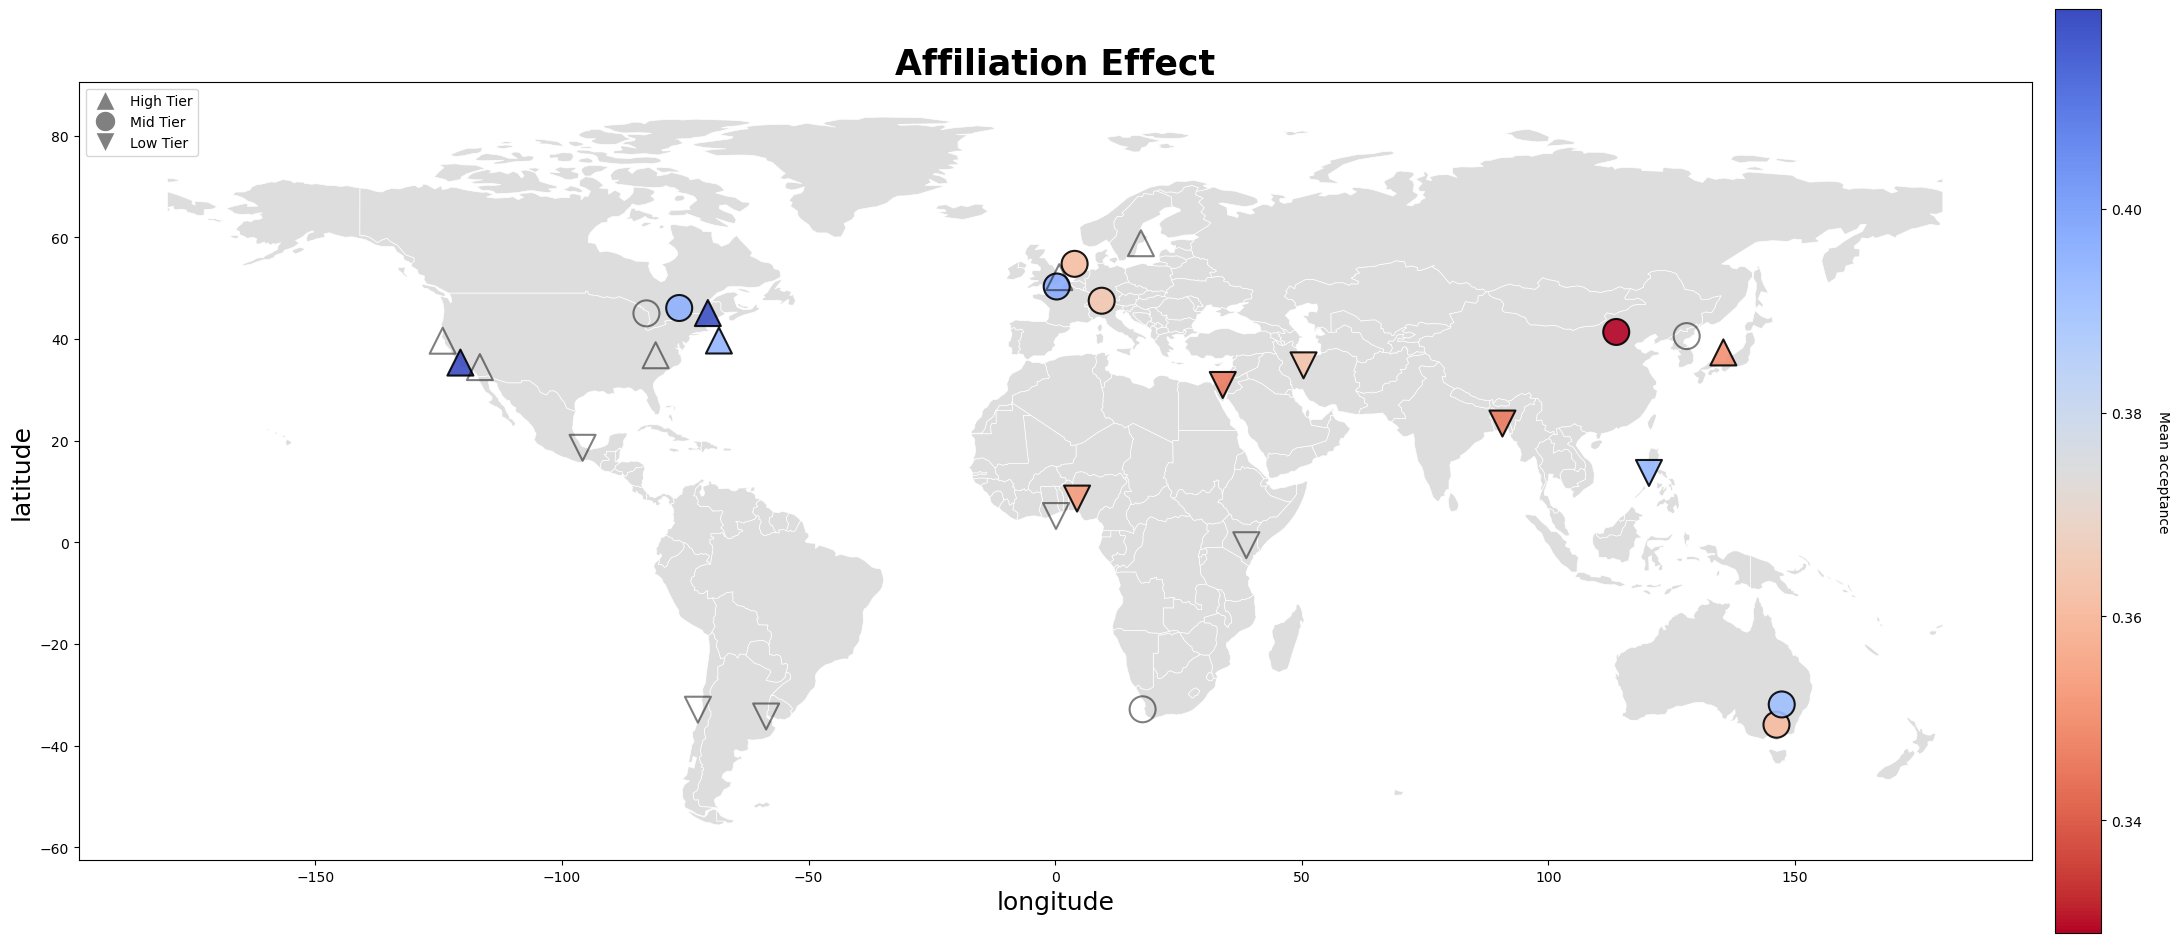

In [1]:
# Current version of worldmap plot

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
import numpy as np

# Load the data
df = pd.read_csv('/S2_Data_analyses/NEW_affiliation_with_geocode.csv', sep=';')

# Create a jitter function
def jitter_series(series, scale_factor=1.8):
    return series + np.random.randn(series.shape[0]) * scale_factor

# Apply jitter to longitude and latitude
df['longitude'] = jitter_series(df['longitude'])
df['latitude'] = jitter_series(df['latitude'])

# Create a GeoDataFrame from the data
df['geometry'] = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# Filter data based on 'hi_1mi_2low_3' and 'Sig' values
df_hi_sig1 = df[(df['hi_1mi_2low_3'] == 1) & (df['Sig'] == 1)]
df_mi_sig1 = df[(df['hi_1mi_2low_3'] == 2) & (df['Sig'] == 1)]
df_low_sig1 = df[(df['hi_1mi_2low_3'] == 3) & (df['Sig'] == 1)]

df_hi_sig0 = df[(df['hi_1mi_2low_3'] == 1) & (df['Sig'] == 0)]
df_mi_sig0 = df[(df['hi_1mi_2low_3'] == 2) & (df['Sig'] == 0)]
df_low_sig0 = df[(df['hi_1mi_2low_3'] == 3) & (df['Sig'] == 0)]

# Load a map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create the plot
fig, ax = plt.subplots(figsize=(30, 20))

# Add the world map to the plot excluding Antarctica
world[world['continent'] != 'Antarctica'].plot(ax=ax, color='#DDDDDD', edgecolor='#FFFFFF', linewidth=0.5)

# Determine normalization based on the full range of 'Mean acceptance' values for all datasets with Sig=1
norm = Normalize(vmin=df[df['Sig'] == 1]['Mean acceptance'].min(), vmax=df[df['Sig'] == 1]['Mean acceptance'].max())

# Increase data spot size
data_spot_size = 350  # You can adjust this value to increase or decrease the spot size

# Plot the data with Sig=1 (colored based on 'Mean acceptance')
ax.scatter(df_hi_sig1['longitude'], df_hi_sig1['latitude'], c=df_hi_sig1['Mean acceptance'], edgecolor='black', linewidth=1.5, marker='^', s=data_spot_size, alpha=0.9, cmap='coolwarm_r', norm=norm, label='hi_1mi_2low_3 = 1')  
ax.scatter(df_mi_sig1['longitude'], df_mi_sig1['latitude'], c=df_mi_sig1['Mean acceptance'], edgecolor='black', linewidth=1.5, marker='o', s=data_spot_size, alpha=0.9, cmap='coolwarm_r', norm=norm, label='hi_1mi_2low_3 = 2')  
ax.scatter(df_low_sig1['longitude'], df_low_sig1['latitude'], c=df_low_sig1['Mean acceptance'], edgecolor='black', linewidth=1.5, marker='v', s=data_spot_size, alpha=0.9, cmap='coolwarm_r', norm=norm, label='hi_1mi_2low_3 = 3')  

# Plot the data with Sig=0 (transparent fill)
ax.scatter(df_hi_sig0['longitude'], df_hi_sig0['latitude'], color='none', edgecolor='black', linewidth=1.5, marker='^', s=data_spot_size, alpha=0.5)
ax.scatter(df_mi_sig0['longitude'], df_mi_sig0['latitude'], color='none', edgecolor='black', linewidth=1.5, marker='o', s=data_spot_size, alpha=0.5)
ax.scatter(df_low_sig0['longitude'], df_low_sig0['latitude'], color='none', edgecolor='black', linewidth=1.5, marker='v', s=data_spot_size, alpha=0.5)


# Add title, labels, and colorbar
ax.set_title('Affiliation Effect', fontdict={'fontsize': 25, 'fontweight': 'bold'})
ax.set_xlabel('longitude', fontdict={'fontsize': 18})
ax.set_ylabel('latitude', fontdict={'fontsize': 18})
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r'), ax=ax, orientation='vertical', pad=0.01, shrink=0.6)
cbar.set_label('Mean acceptance', rotation=270, labelpad=20)

# Create custom legend
legend_elements = [Line2D([0], [0], marker='^', color='w', markerfacecolor='grey', markersize=15, label='High Tier'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=15, label='Mid Tier'),
                   Line2D([0], [0], marker='v', color='w', markerfacecolor='grey', markersize=15, label='Low Tier')]
ax.legend(handles=legend_elements, loc="upper left")

# Show the plot
plt.show()


/var/folders/h9/t_5ml32n67x_kgbhymld0b580000gn/T/ipykernel_12173/3415122265.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['longitude'] = boston_df['longitude'] + np.random.uniform(-jitter_boston, jitter_boston, size=len(boston_df))
/var/folders/h9/t_5ml32n67x_kgbhymld0b580000gn/T/ipykernel_12173/3415122265.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['latitude'] = boston_df['latitude'] + np.random.uniform(-jitter_boston, jitter_boston, size=len(boston_df))
/var/folders/h9/

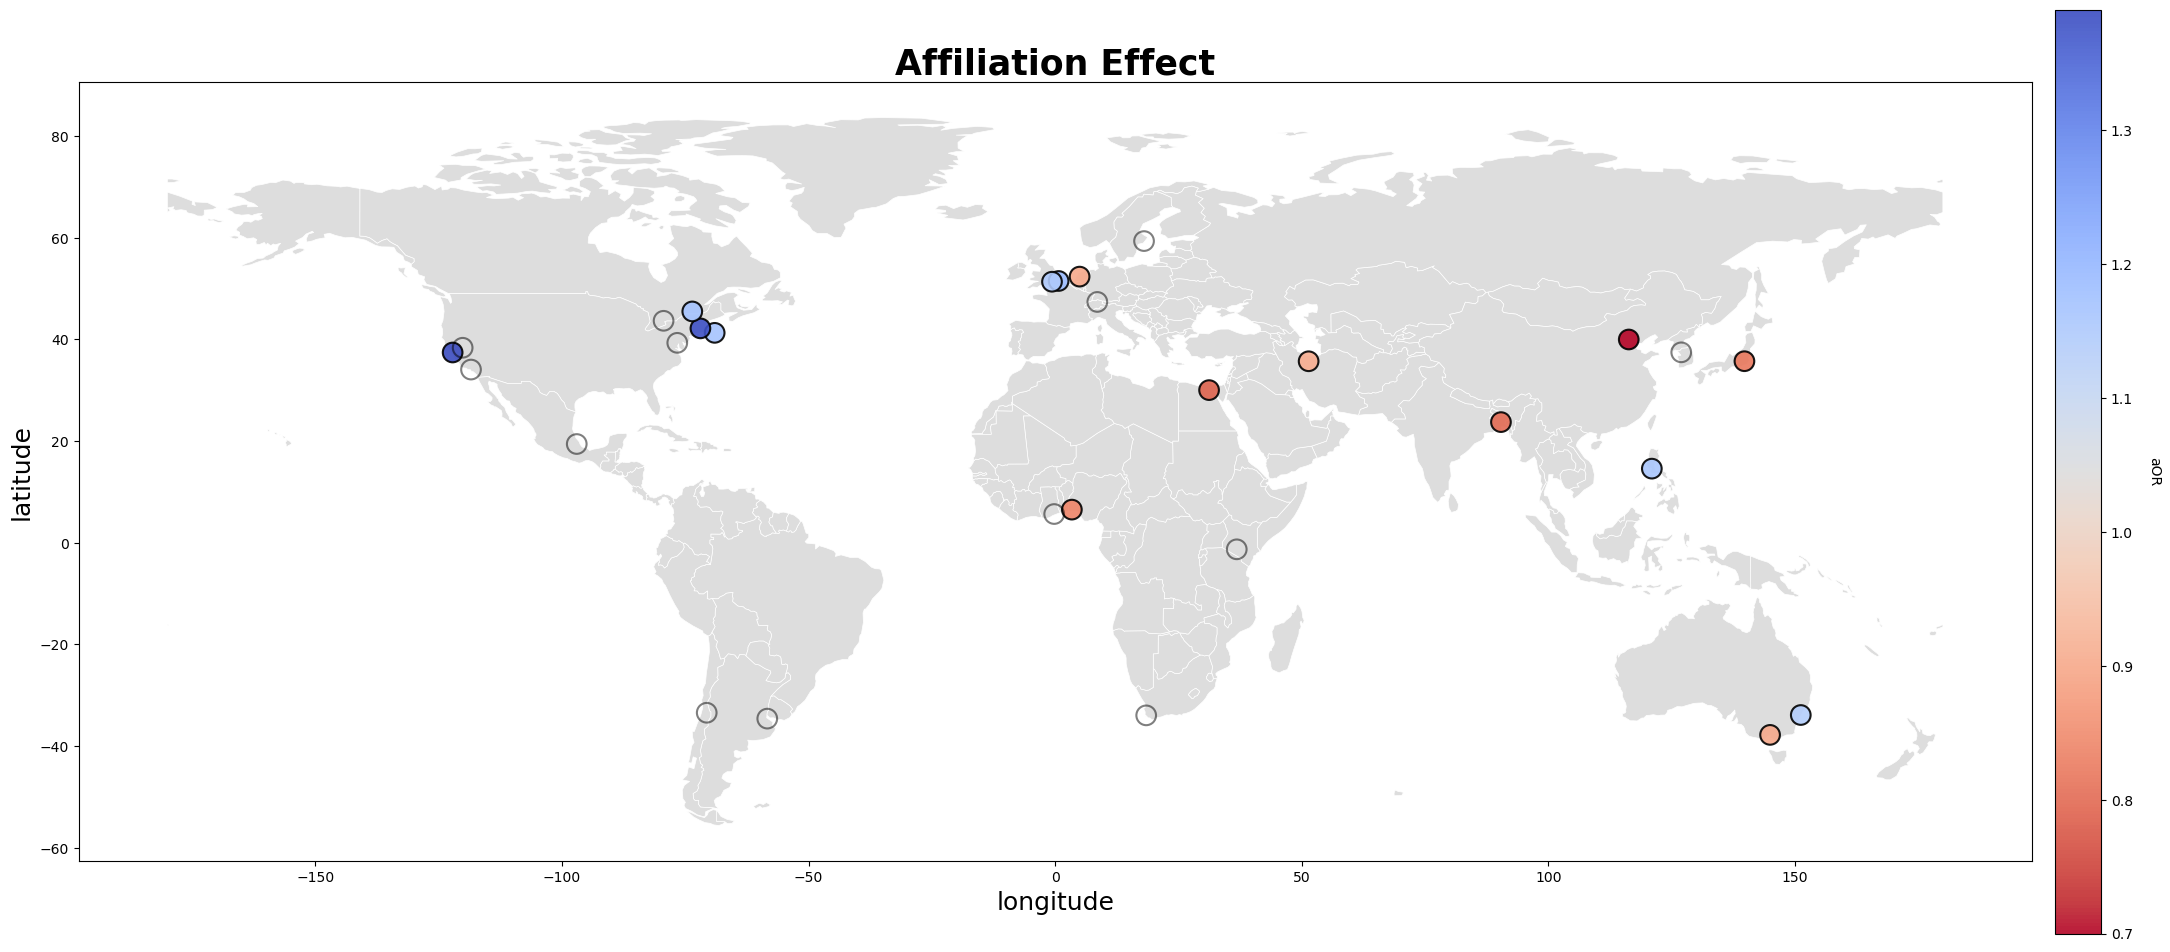

                                         aff_num   aOR    P>z  sig   
0                               Cairo University  0.79  0.000    1  \
1                         Harvard Medical School  1.17  0.000    1   
2                       Johns Hopkins University  0.93  0.114    0   
3                           Karolinska Institute  0.97  0.463    0   
4                           Kings College London  1.19  0.000    1   
5    Massachusetts Institute of Technology (MIT)  1.38  0.000    1   
6                              McGill University  1.17  0.000    1   
7                              Peking University  0.70  0.000    1   
8                      Seoul National University  1.03  0.514    0   
9                            Stanford University  1.39  0.000    1   
10     Universidad Nacional AutÃ³noma de MÃ©xico  0.98  0.623    0   
11                   Universidad de Buenos Aires  1.04  0.408    0   
12                          Universidad de Chile  1.03  0.581    0   
13                  

In [3]:
# Archive of previous reviewed version of map plot

# Create map based on affiliationbias data

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('/S2_Data_analyses/S2_2_b_affiliation_with_geocode.csv', sep=';')

# Identify the index of the 'University of Sydney'
sydney_index = df[df['aff_num'] == 'University of Sydney'].index

# Set the latitude and longitude for the 'University of Sydney'
df.loc[sydney_index, 'latitude'] = -33.889
df.loc[sydney_index, 'longitude'] = 151.188

# Identify the index of the 'University of Cambridge'
cambridge_index = df[df['aff_num'] == 'University of Cambridge'].index

# Set the latitude and longitude for the 'University of Cambridge'
df.loc[cambridge_index, 'latitude'] = 52.2043
df.loc[cambridge_index, 'longitude'] = 0.1149

# Convert 'aOR' values from strings to numbers
df['aOR'] = df['aOR'].str.replace(',', '.').astype(float)

# Filter out rows with non-numeric 'aOR' values
df = df.dropna(subset=['aOR'])

# Apply jitter to longitude and latitude only in Boston and UK areas
jitter_boston = 2.4  # Adjust this to add more or less jittering
jitter_uk = 1.2 # Adjust this to add more or less jittering
jitter_sf = 2.4  # Adjust this to add more or less jittering

# Jitter Boston area
boston_df = df[(df['latitude'] > 42.3) & (df['latitude'] < 42.4) & (df['longitude'] > -71.2) & (df['longitude'] < -70.9)]
boston_df['longitude'] = boston_df['longitude'] + np.random.uniform(-jitter_boston, jitter_boston, size=len(boston_df))
boston_df['latitude'] = boston_df['latitude'] + np.random.uniform(-jitter_boston, jitter_boston, size=len(boston_df))

# Jitter UK area
uk_df = df[(df['latitude'] > 50) & (df['latitude'] < 59) & (df['longitude'] > -10) & (df['longitude'] < 2)]
uk_df['longitude'] = uk_df['longitude'] + np.random.uniform(-jitter_uk, jitter_uk, size=len(uk_df))
uk_df['latitude'] = uk_df['latitude'] + np.random.uniform(-jitter_uk, jitter_uk, size=len(uk_df))

# Jitter San Francisco area
sf_df = df[(df['latitude'] > 37.5) & (df['latitude'] < 37.9) & (df['longitude'] > -123.1) & (df['longitude'] < -122.35)]
sf_df['longitude'] = sf_df['longitude'] + np.random.uniform(-jitter_sf, jitter_sf, size=len(sf_df))
sf_df['latitude'] = sf_df['latitude'] + np.random.uniform(-jitter_sf, jitter_sf, size=len(sf_df))

# Replace the rows in the original dataframe with the jittered rows
df.update(boston_df)
df.update(uk_df)
df.update(sf_df)

# Create a GeoDataFrame from the data
df['geometry'] = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Load a map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create the plot with specified size
fig, ax = plt.subplots(figsize=(30, 20))

# Add the world map to the plot excluding Antarctica
world[world['continent'] != 'Antarctica'].plot(ax=ax, color='#DDDDDD', edgecolor='#FFFFFF', linewidth=0.5)

# Separate dataframe into sig = 1 and sig = 0
df_sig1 = df[df['sig'] == 1]
df_sig0 = df[df['sig'] == 0]

# Add the points to the plot with different markers, larger size, and alpha for transparency
scatter_sig1 = ax.scatter(df_sig1['longitude'], df_sig1['latitude'], c=df_sig1['aOR'], edgecolor='black', linewidth=1.5, s=200, alpha=0.9, cmap='coolwarm_r')
scatter_sig0 = ax.scatter(df_sig0['longitude'], df_sig0['latitude'], color='none', edgecolor='black', linewidth=1.5, s=200, alpha=0.5)

# Add title and labels
ax.set_title('Affiliation Effect', fontdict={'fontsize': 25, 'fontweight': 'bold'})
ax.set_xlabel('longitude', fontdict={'fontsize': 18})
ax.set_ylabel('latitude', fontdict={'fontsize': 18})

# Add a colorbar
cbar = fig.colorbar(scatter_sig1, ax=ax, orientation='vertical', pad=0.01, shrink=0.6)
cbar.set_label('aOR', rotation=270, labelpad=20)

# Show the plot
plt.show()


print(df)
